In [1]:
import pysal

In [2]:
ls data

codebook.csv  scag_region.cpg  scag_region.gpkg  scag_region.shp
__MACOSX/     scag_region.dbf  scag_region.prj   scag_region.shx


In [3]:
import geopandas

In [4]:
df = geopandas.read_file('data/scag_region.shp')

In [5]:
df.head()

,geoid,n_asian_un,n_black_un,n_hispanic,n_native_u,n_white_un,n_persons_,n_asian_ov,n_black_ov,n_hispan_1,...,year,n_total__3,p_nonhis_1,p_white__1,p_black__1,p_hispan_3,p_native_1,p_asian__1,p_disabled,geometry
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,None,None,None,...,2010,2903.0,64.726214,None,None,None,None,None,None,"POLYGON ((-118.44870 34.16485, -118.43997 34.1..."
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,None,None,None,...,2010,1487.0,28.679979,None,None,None,None,None,None,"POLYGON ((-118.56229 34.22033, -118.55792 34.2..."
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,None,None,None,...,2010,1388.0,14.846188,None,None,None,None,None,None,"POLYGON ((-118.57976 34.21558, -118.57539 34.2..."
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,None,None,None,...,2010,928.0,33.378933,None,None,None,None,None,None,"POLYGON ((-118.61472 34.21952, -118.61039 34.2..."
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,None,None,None,...,2010,1054.0,0.058565,None,None,None,None,None,None,"POLYGON ((-118.25416 33.93882, -118.25413 33.9..."


In [6]:
df['p_hispan_3']

0       None
1       None
2       None
3       None
4       None
        ... 
4401    None
4402    None
4403    None
4404    None
4405    None
Name: p_hispan_3, Length: 4406, dtype: object

In [7]:
df['median_inc']

0        69659.126404
1        83032.537453
2        91401.128277
3        88962.966292
4                 NaN
            ...      
4401     51573.823034
4402     92016.385768
4403              NaN
4404     50444.580524
4405    103869.620787
Name: median_inc, Length: 4406, dtype: float64

In [8]:
df['median_hom']

0       647272.659176
1       400842.977528
2       416741.666667
3       406178.838951
4       251438.857678
            ...      
4401    129802.996255
4402    291838.951311
4403    273871.254682
4404    255794.662921
4405    581717.790262
Name: median_hom, Length: 4406, dtype: float64

## Handle missing values


In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
w = pysal.lib.weights.contiguity.Queen.from_dataframe(df)

/home/serge/anaconda3/envs/pysal2.2.0/lib/python3.8/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [11]:
w.component_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [12]:
df['component'] = w.component_labels

In [13]:
%matplotlib inline

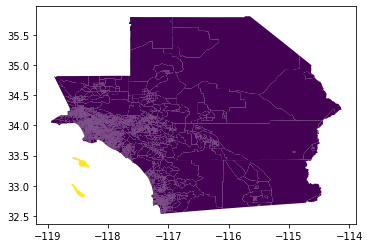

In [14]:
df.plot(column='component')

In [15]:
df = df[df['component']==0]

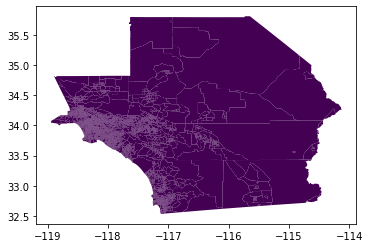

In [16]:
df.plot(column='component')

In [17]:
w = pysal.lib.weights.contiguity.Queen.from_dataframe(df)

In [18]:
w.pct_nonzero

0.1456441629729723

In [19]:
w.histogram

[(1, 6),
 (2, 20),
 (3, 115),
 (4, 403),
 (5, 861),
 (6, 1100),
 (7, 908),
 (8, 495),
 (9, 262),
 (10, 116),
 (11, 51),
 (12, 19),
 (13, 11),
 (14, 14),
 (15, 9),
 (16, 8),
 (17, 3),
 (18, 0),
 (19, 1),
 (20, 1),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 1)]

In [20]:
max_c = [key for key in w.cardinalities if w.cardinalities[key] == 25]

In [21]:
max_c

[2468]

In [22]:
df.iloc[2468]

geoid                                               06037404600
n_asian_un                                                    0
n_black_un                                                    5
n_hispanic                                                  344
n_native_u                                                   22
                                    ...                        
p_native_1                                                  NaN
p_asian__1                                                  NaN
p_disabled                                                  NaN
geometry      POLYGON ((-118.007342 34.105566, -118.006866 3...
component                                                     0
Name: 2469, Length: 195, dtype: object

In [23]:
w.cardinalities

{0: 9,
 1: 9,
 2: 4,
 3: 7,
 4: 7,
 5: 5,
 6: 5,
 7: 6,
 8: 5,
 9: 8,
 10: 9,
 11: 8,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 6,
 17: 6,
 18: 4,
 19: 5,
 20: 5,
 21: 6,
 22: 7,
 23: 9,
 24: 6,
 25: 4,
 26: 7,
 27: 8,
 28: 7,
 29: 5,
 30: 7,
 31: 2,
 32: 6,
 33: 6,
 34: 8,
 35: 3,
 36: 7,
 37: 7,
 38: 5,
 39: 8,
 40: 6,
 41: 5,
 42: 5,
 43: 4,
 44: 6,
 45: 6,
 46: 7,
 47: 7,
 48: 4,
 49: 6,
 50: 7,
 51: 4,
 52: 5,
 53: 6,
 54: 13,
 55: 6,
 56: 7,
 57: 6,
 58: 8,
 59: 6,
 60: 6,
 61: 6,
 62: 2,
 63: 6,
 64: 6,
 65: 8,
 66: 6,
 67: 7,
 68: 7,
 69: 6,
 70: 3,
 71: 5,
 72: 6,
 73: 6,
 74: 3,
 75: 7,
 76: 6,
 77: 5,
 78: 5,
 79: 5,
 80: 8,
 81: 8,
 82: 6,
 83: 8,
 84: 9,
 85: 7,
 86: 7,
 87: 6,
 88: 7,
 89: 5,
 90: 5,
 91: 7,
 92: 7,
 93: 6,
 94: 5,
 95: 7,
 96: 8,
 97: 8,
 98: 4,
 99: 7,
 100: 5,
 101: 4,
 102: 4,
 103: 6,
 104: 9,
 105: 6,
 106: 6,
 107: 7,
 108: 4,
 109: 8,
 110: 6,
 111: 6,
 112: 5,
 113: 6,
 114: 6,
 115: 6,
 116: 6,
 117: 7,
 118: 6,
 119: 8,
 120: 6,
 121: 6,
 122: 6,
 1

In [24]:
c = list(w.cardinalities.values())

In [25]:
df['cardinalities'] = c

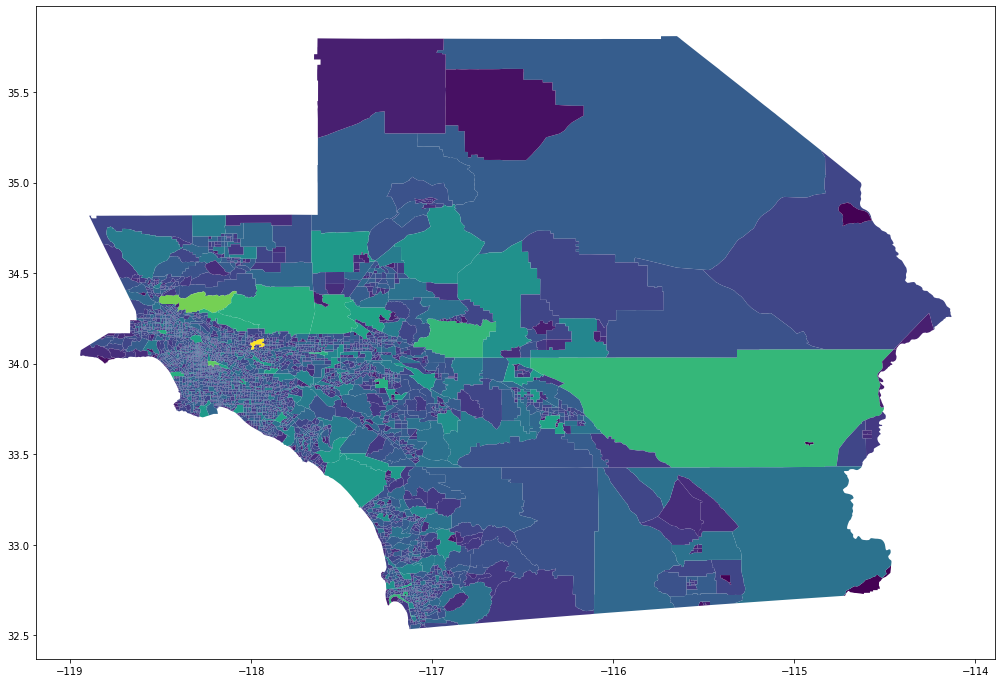

In [26]:
df.plot(column='cardinalities',figsize=(18,12))

In [27]:
df[['geoid', 'cardinalities']].sort_values(by=['cardinalities']).head

<bound method NDFrame.head of             geoid  cardinalities
1387  06025010900              1
1621  06037990300              1
3496  06073005500              1
2967  06025940000              1
245   06065981000              1
...           ...            ...
414   06065046900             17
469   06071011500             17
3607  06037532400             19
1022  06037930200             20
2469  06037404600             25

[4404 rows x 2 columns]>

In [28]:
w.cardinalities[2468]


25

In [30]:
df.iloc[2468]

geoid                                                  06037404600
n_asian_un                                                       0
n_black_un                                                       5
n_hispanic                                                     344
n_native_u                                                      22
                                       ...                        
p_asian__1                                                     NaN
p_disabled                                                     NaN
geometry         POLYGON ((-118.007342 34.105566, -118.006866 3...
component                                                        0
cardinalities                                                   25
Name: 2469, Length: 196, dtype: object

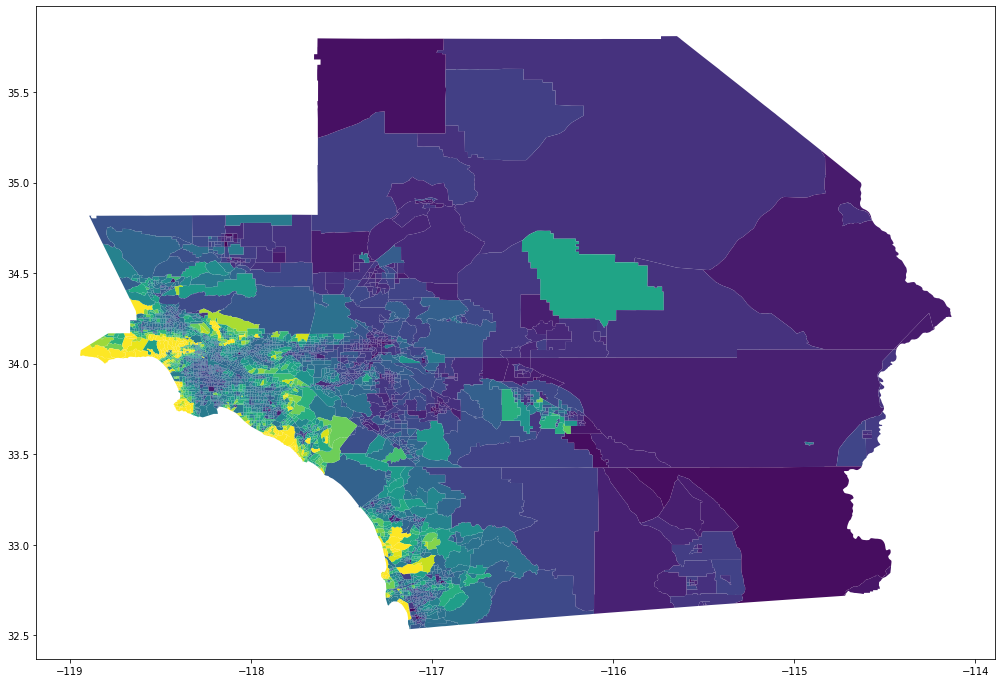

In [32]:
df.plot(column='median_hom',figsize=(18,12))

In [33]:
df.to_file("data/socal.shp")

In [ ]:
df1.plot(column='median_hom',figsize=(18,12), scheme='EqualInterval', k=3)

In [ ]:
df1.plot(column='median_hom',figsize=(18,12), scheme='EqualInterval', k=7)

In [ ]:
mi_hom = pysal.explore.esda.moran.Moran(df1['median_hom'], w)

In [ ]:
import mapclassify

In [ ]:
fj5 = mapclassify.FisherJenks(df1['median_hom'], k=5)

In [ ]:
fj5

In [ ]:
df.plot(column='median_hom',figsize=(18,12), scheme='FisherJenks', k=7)

In [ ]:
df2.plot(column='median_hom',figsize=(18,12), scheme='Quantiles', k=7)

In [ ]:
mi_hom.I

In [ ]:
# dff.fillna(dff.mean())

In [ ]:
df2 = df1.fillna(df1.mean())

In [ ]:
mi_hom = pysal.explore.esda.moran.Moran(df2['median_hom'], w)

In [ ]:
mi_hom.I

In [ ]:
mi_hom.EI

In [ ]:
mi_hom.p_z_sim

In [ ]:
mi_hom.p_norm

In [ ]:
df2 = df1.fillna(df1.median())

In [ ]:
df2['median_hom'].min()